In [17]:
import pandas as pd

import missingno as msno

In [18]:
baseline = pd.read_csv('homepap-baseline-dataset-0.1.0.csv')
baseline_var = baseline.columns

In [19]:
onemonth = pd.read_csv('homepap-month1-dataset-0.1.0.csv')
onemonth_var = onemonth.columns

In [20]:
threemonth = pd.read_csv('homepap-month3-dataset-0.1.0.csv')
threemonth_var = threemonth.columns

In [21]:
samevar = []
for i, x in enumerate(baseline_var):
    if x in onemonth_var:
        samevar.append(x)
    else:
        i += 1

allsame = []

for i, x in enumerate(samevar):
    if x in threemonth_var:
        allsame.append(x)
    else:
        i += 1
allsame.sort()
print(allsame)

['age', 'agg_ment', 'agg_phys', 'bp_norm', 'cal_total', 'clusterid', 'diastolic', 'esstotal', 'ethnicity', 'fosq_actlev', 'fosq_genprd', 'fosq_global', 'fosq_sexual', 'fosq_socout', 'fosq_vigiln', 'gender', 'gh_norm', 'mh_norm', 'nsrrid', 'pf_norm', 'race3', 're_norm', 'rp_norm', 'sf36_mcs', 'sf36_pcs', 'sf_norm', 'systolic', 'treatmentarm', 'visit', 'vt_norm']


In [22]:
print(len(allsame))

30


In [23]:
baseline['test'] = [0 for i in range(len(onemonth['age']))]
onemonth['test'] = [1 for i in range(len(onemonth['age']))]
threemonth['test'] = [3 for i in range(len(onemonth['age']))]

In [24]:
homepap_data = pd.concat([baseline, onemonth, threemonth], ignore_index = True, axis = 0)

In [25]:
homepap_data

nsrrid  clusterid  visit  treatmentarm  age  gender  race3  ethnicity  \
0     1600001         33      1             1   52       1      2        2.0   
1     1600002         35      1             1   53       1      1        2.0   
2     1600003         35      1             1   61       1      1        2.0   
3     1600004         33      1             1   48       1      1        2.0   
4     1600005         29      1             2   42       1      1        2.0   
...       ...        ...    ...           ...  ...     ...    ...        ...   
1114  1600369         33      3             1   47       0      1        2.0   
1115  1600370         35      3             2   51       0      2        2.0   
1116  1600371         29      3             2   40       0      2        2.0   
1117  1600372         35      3             2   62       1      1        2.0   
1118  1600373         68      3             1   38       0      1        2.0   

      heightcm  weightkg  ...  titrated  acceptance  completedm1  completedm3  \
0        183.0     111.3  ...       1.0         1.0          1.0          1.0   
1        185.0     139.7  ...       1.0         1.0          1.0          1.0   
2        183.0      90.3  ...       NaN         NaN          NaN          NaN   
3        177.0     139.8  ...       1.0         0.0          NaN          NaN   
4        183.0      97.6  ...       NaN         NaN          NaN          NaN   
...        ...       ...  ...       ...         ...          ...          ...   
1114       NaN       NaN  ...       NaN         NaN          NaN          NaN   
1115       NaN     127.9  ...       NaN         NaN          NaN          NaN   
1116       NaN       NaN  ...       NaN         NaN          NaN          NaN   
1117       NaN     112.9  ...       NaN         NaN          NaN          NaN   
1118       NaN     122.4  ...       NaN         NaN          NaN          NaN   

      completedm1m3  diagtype  pctsa90p_d  pctsa90p_t  test  avgpapuse  
0               1.0       2.0         NaN         NaN     0        NaN  
1               1.0       3.0        10.9         0.5     0        NaN  
2               NaN       2.0         NaN         NaN     0        NaN  
3               NaN       2.0         NaN         NaN     0        NaN  
4               NaN       1.0         NaN         NaN     0        NaN  
...             ...       ...         ...         ...   ...        ...  
1114            NaN       NaN         NaN         NaN     3        NaN  
1115            NaN       NaN         NaN         NaN     3      264.0  
1116            NaN       NaN         NaN         NaN     3        NaN  
1117            NaN       NaN         NaN         NaN     3      193.0  
1118            NaN       NaN         NaN         NaN     3      226.0  

[1119 rows x 106 columns]

In [26]:
homepap_data.to_csv('homepap_data', index = False)

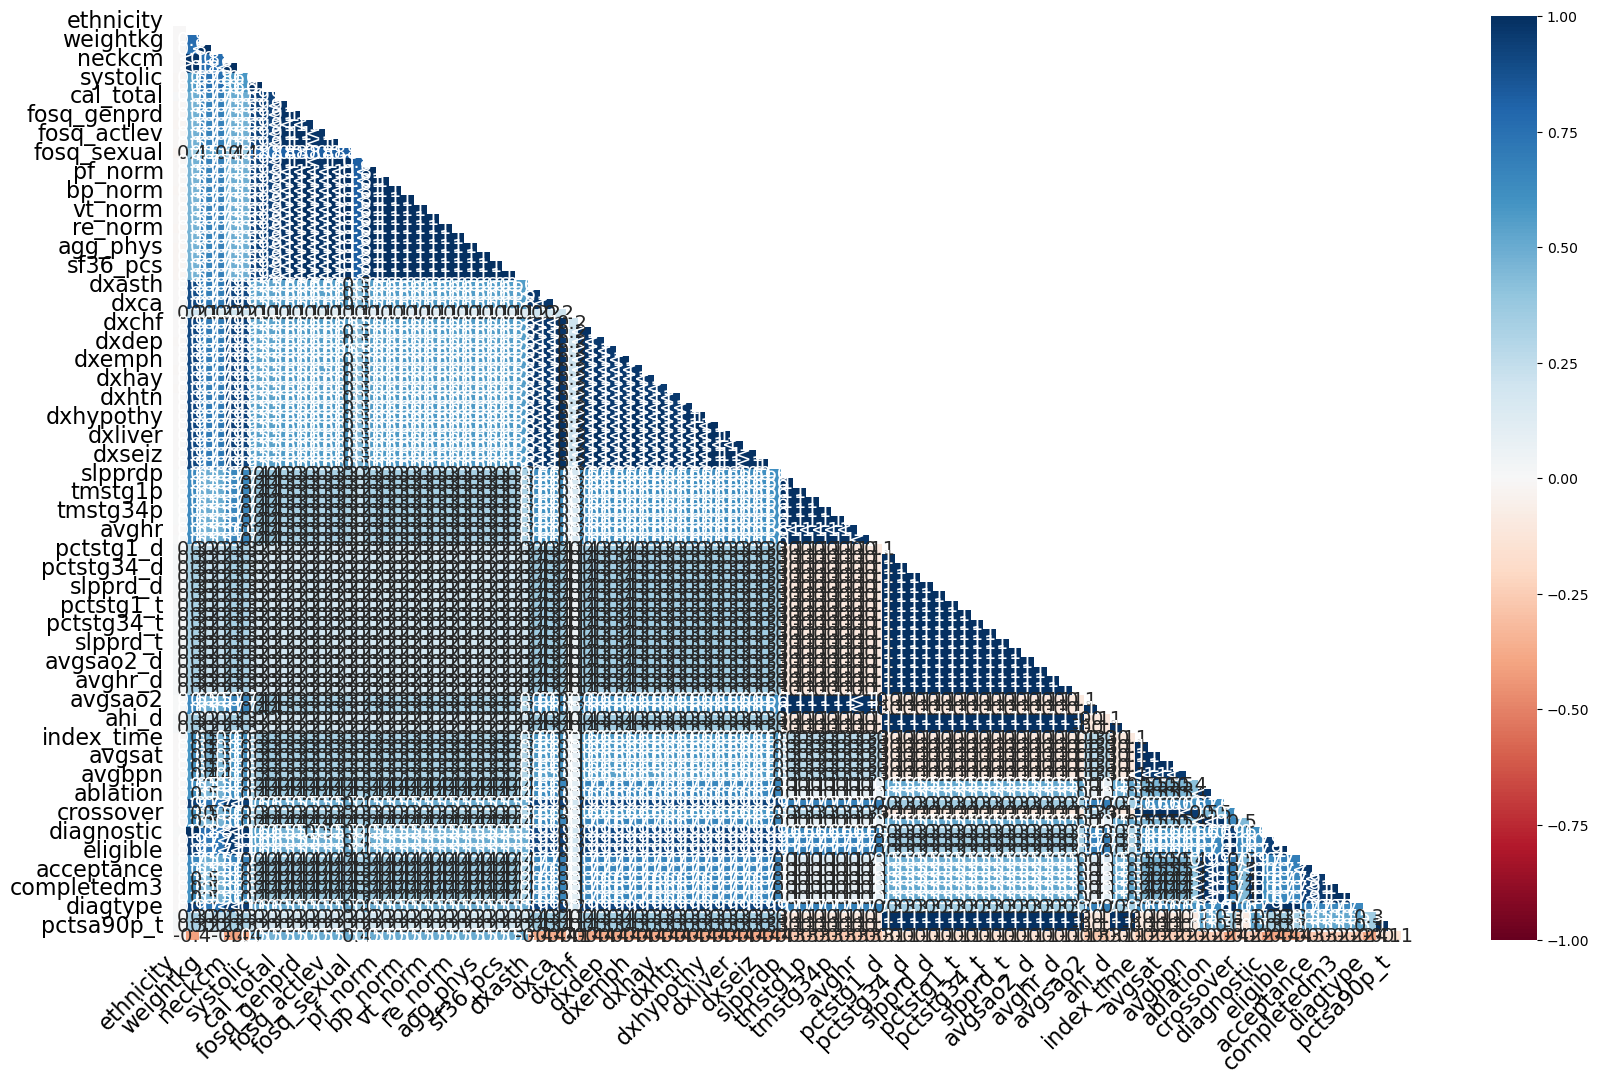

In [29]:
miss = msno.heatmap(homepap_data)

<AxesSubplot:>

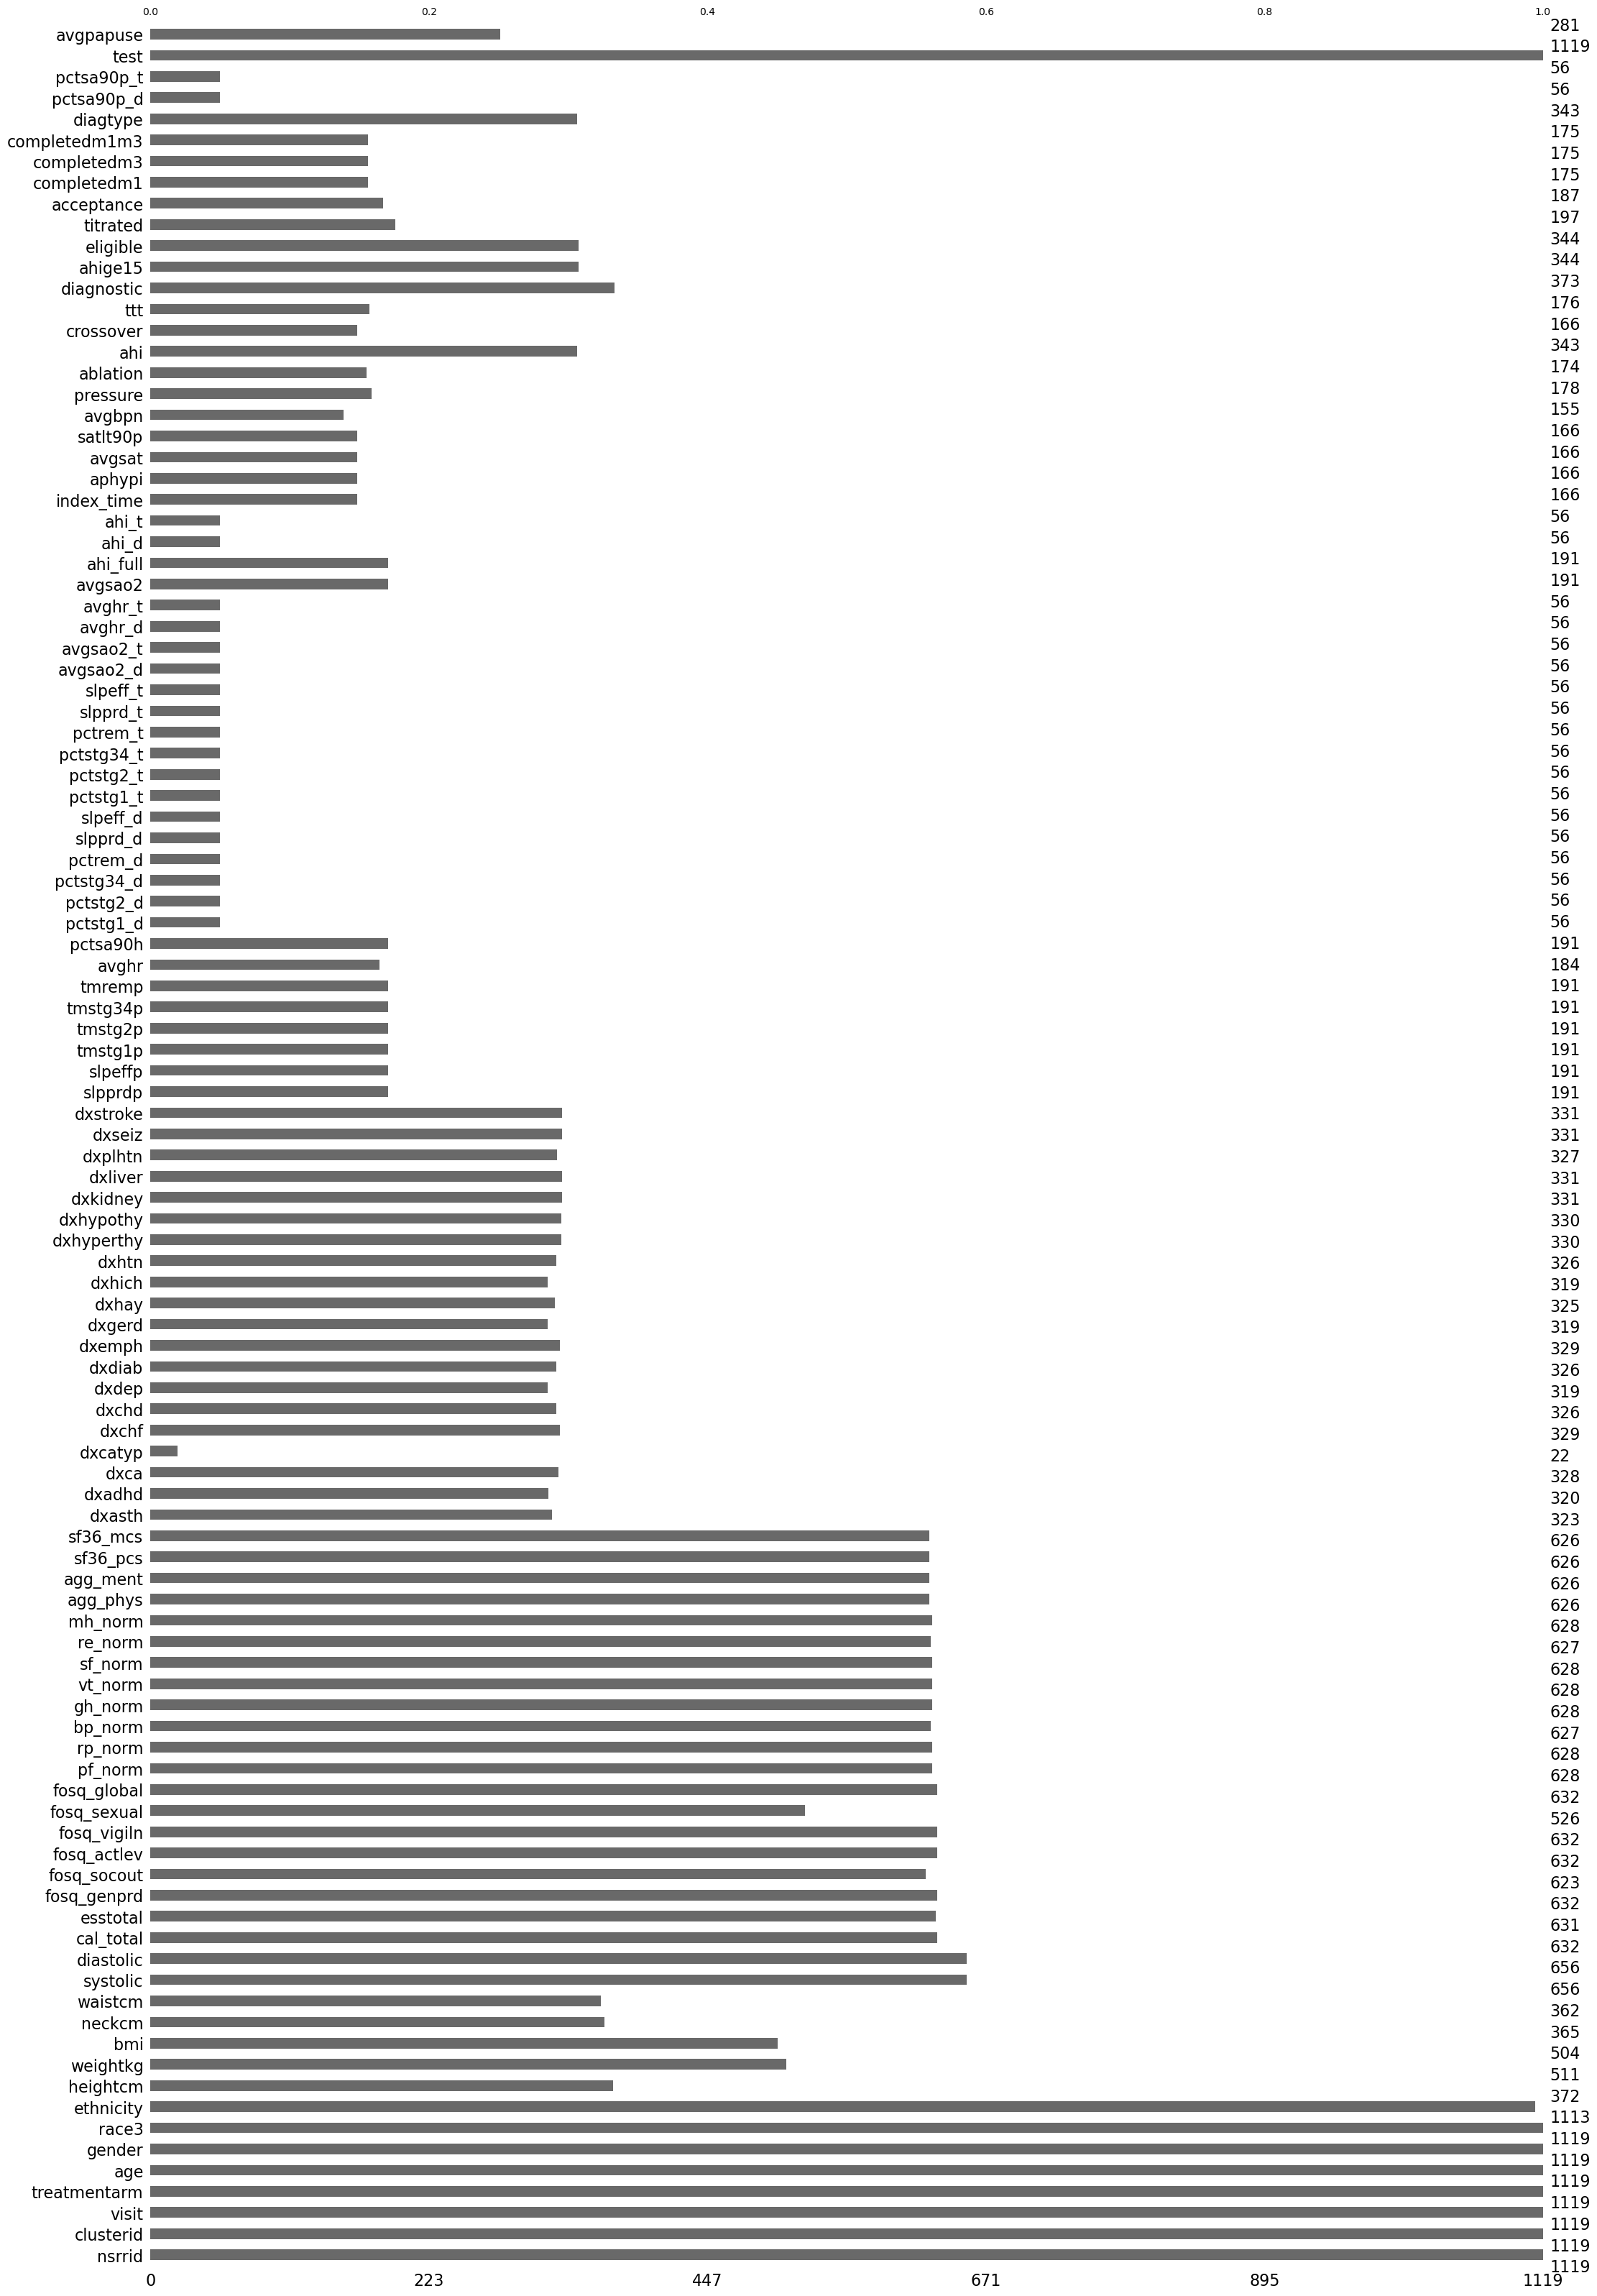

In [30]:
msno.bar(homepap_data)

In [32]:
homepap_comon = homepap_data[['test', 'age', 'agg_ment', 'agg_phys', 'bp_norm', 'cal_total', 'clusterid', 'diastolic', 'esstotal', 'ethnicity', 'fosq_actlev', 'fosq_genprd', 'fosq_global', 'fosq_sexual', 'fosq_socout', 'fosq_vigiln', 'gender', 'gh_norm', 'mh_norm', 'nsrrid', 'pf_norm', 'race3', 're_norm', 'rp_norm', 'sf36_mcs', 'sf36_pcs', 'sf_norm', 'systolic', 'treatmentarm', 'visit', 'vt_norm']]

<AxesSubplot:>

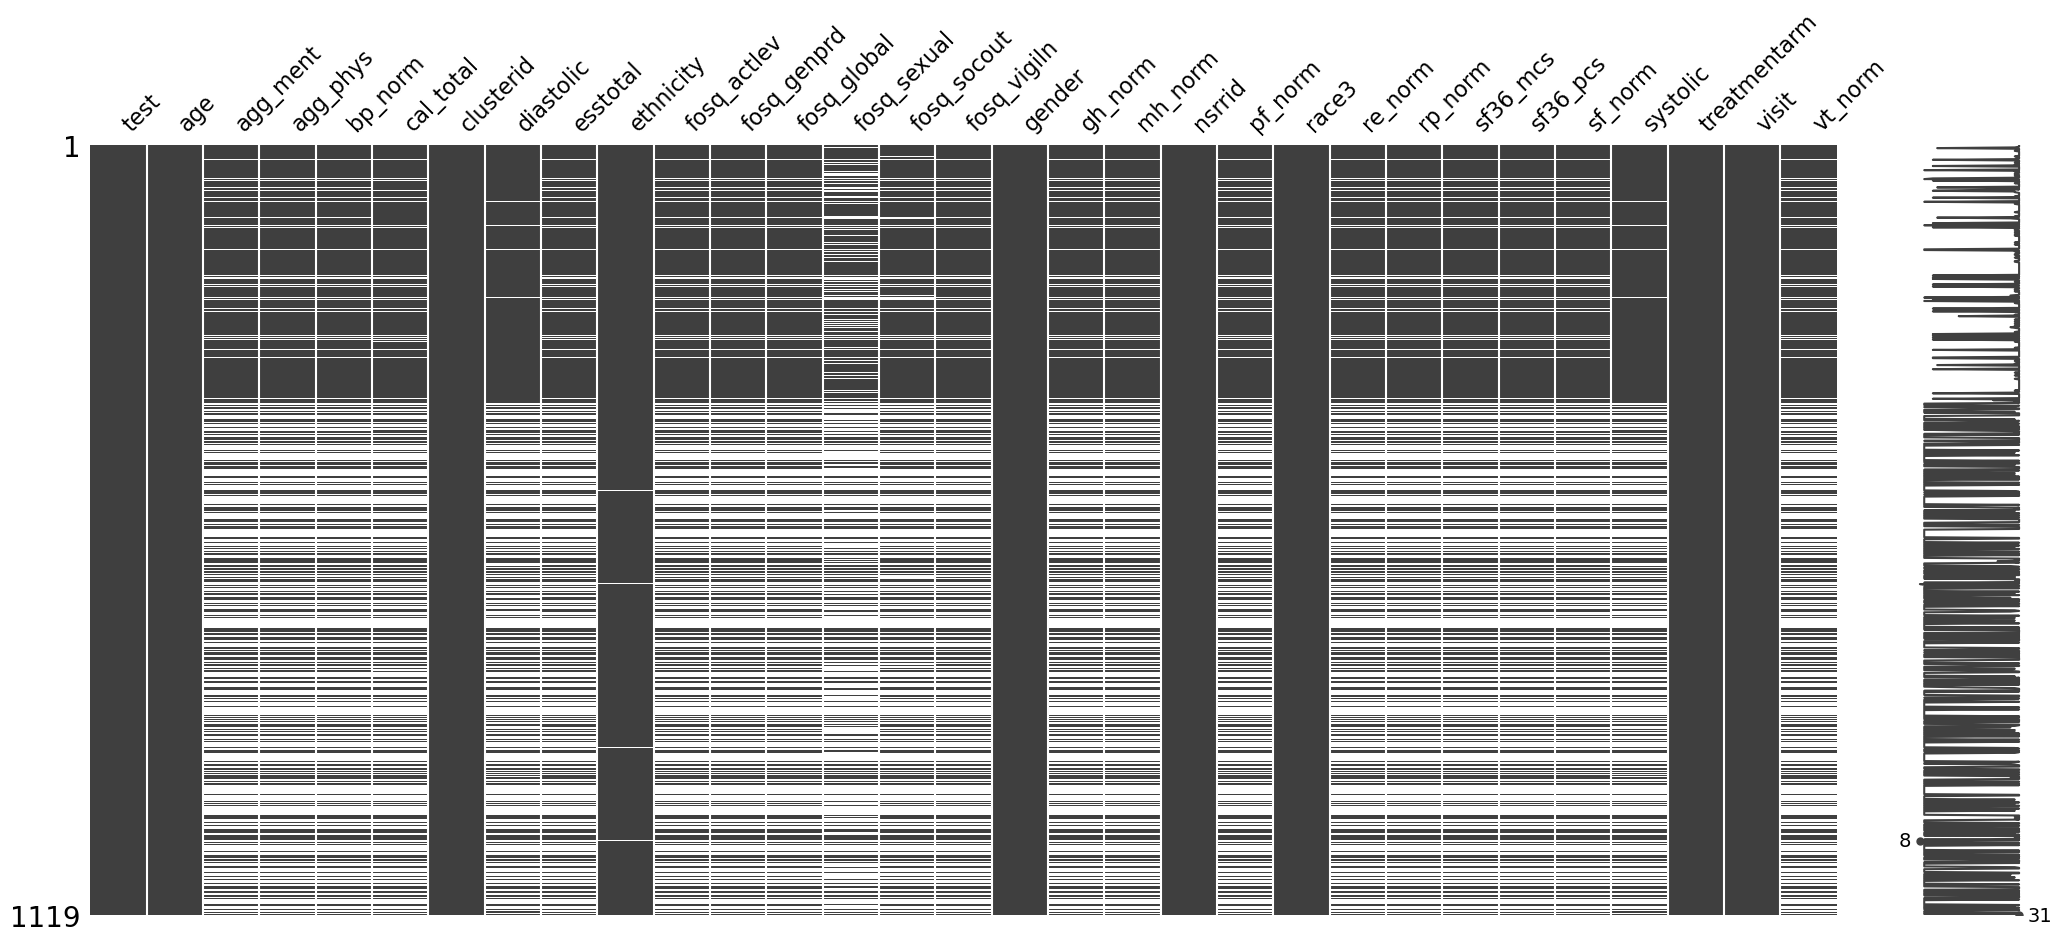

In [33]:
msno.matrix(homepap_comon)

<AxesSubplot:>

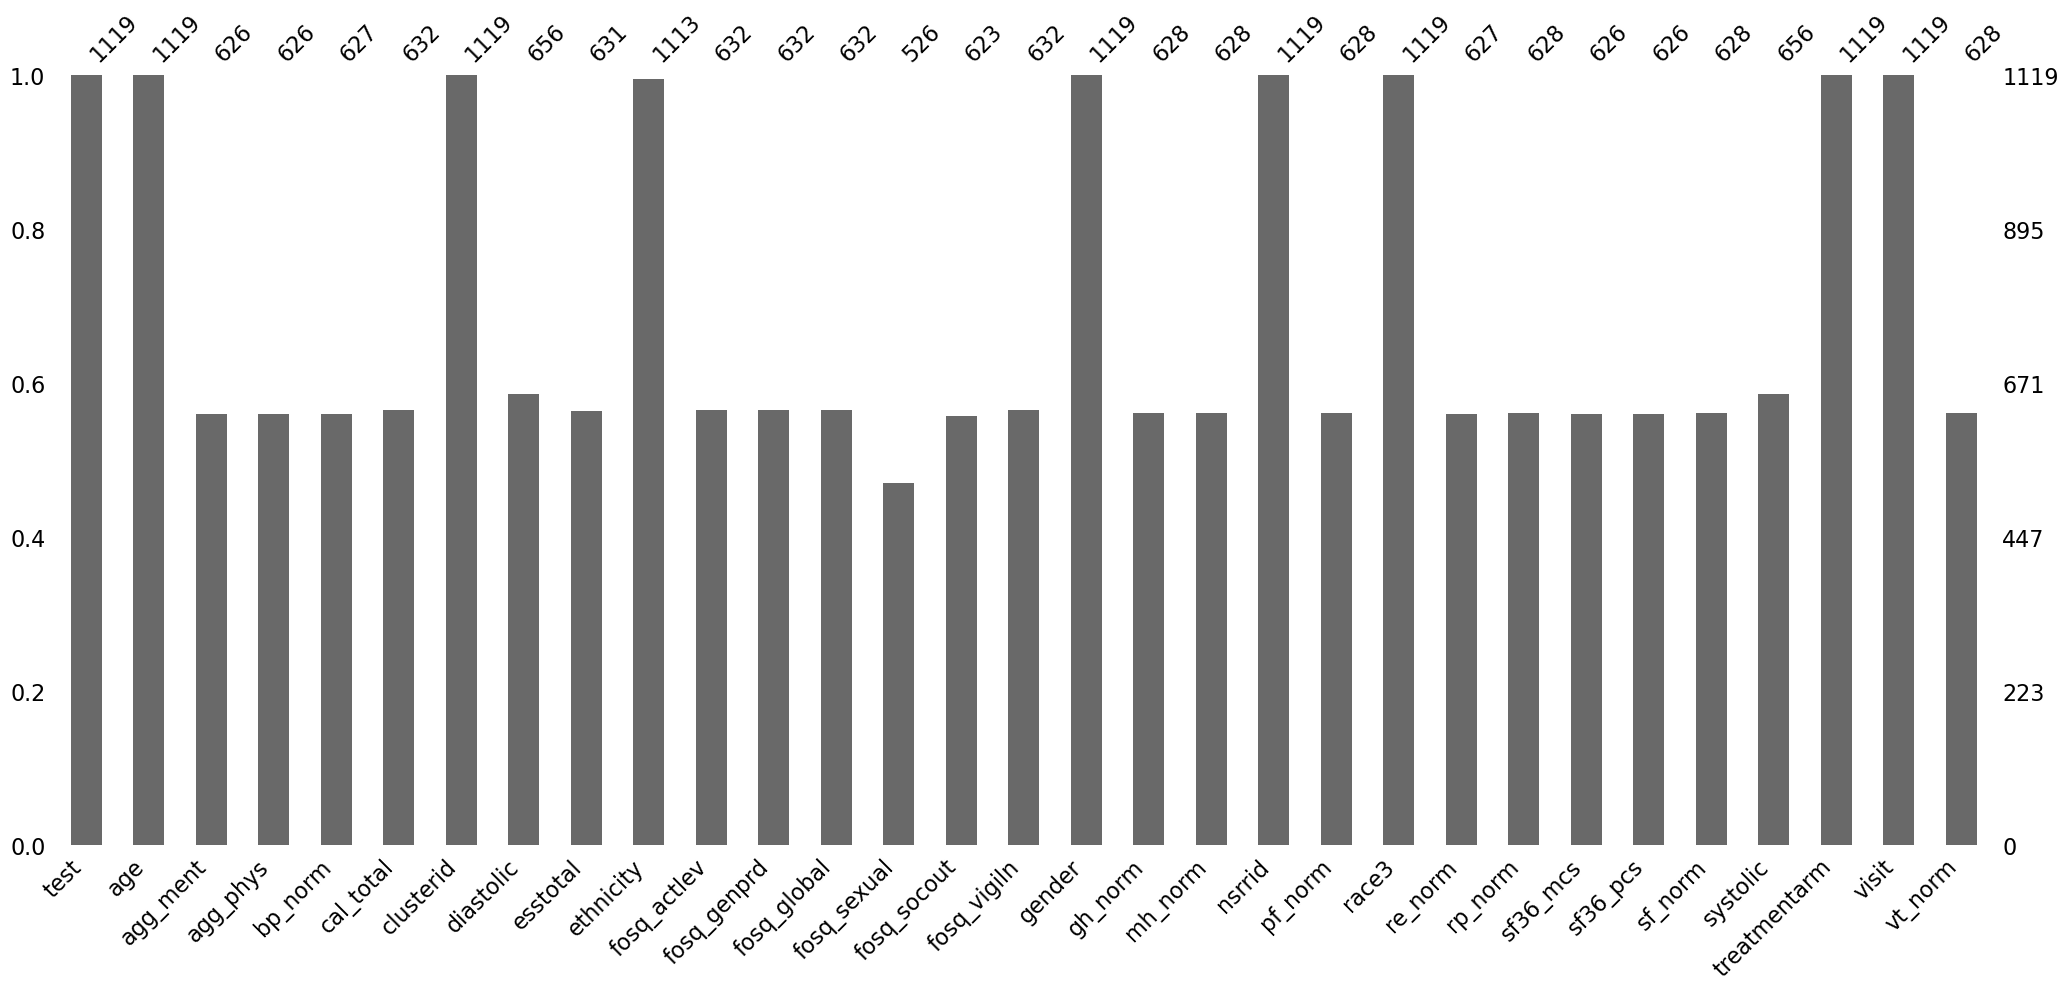

In [34]:
msno.bar(homepap_comon)

In [43]:
# check which rows contain NaNs
nan_rows = homepap_comon.isna().any(axis=1)

# print the rows that contain NaNs
incomplete_ids = homepap_comon['nsrrid'][nan_rows].values

incomplete_ids = [*set(incomplete_ids)]

In [45]:
homepap = homepap_comon[~homepap_comon['nsrrid'].isin(incomplete_ids)]

In [46]:
print(len(homepap_comon))
len(homepap)

1119


267

<AxesSubplot:>

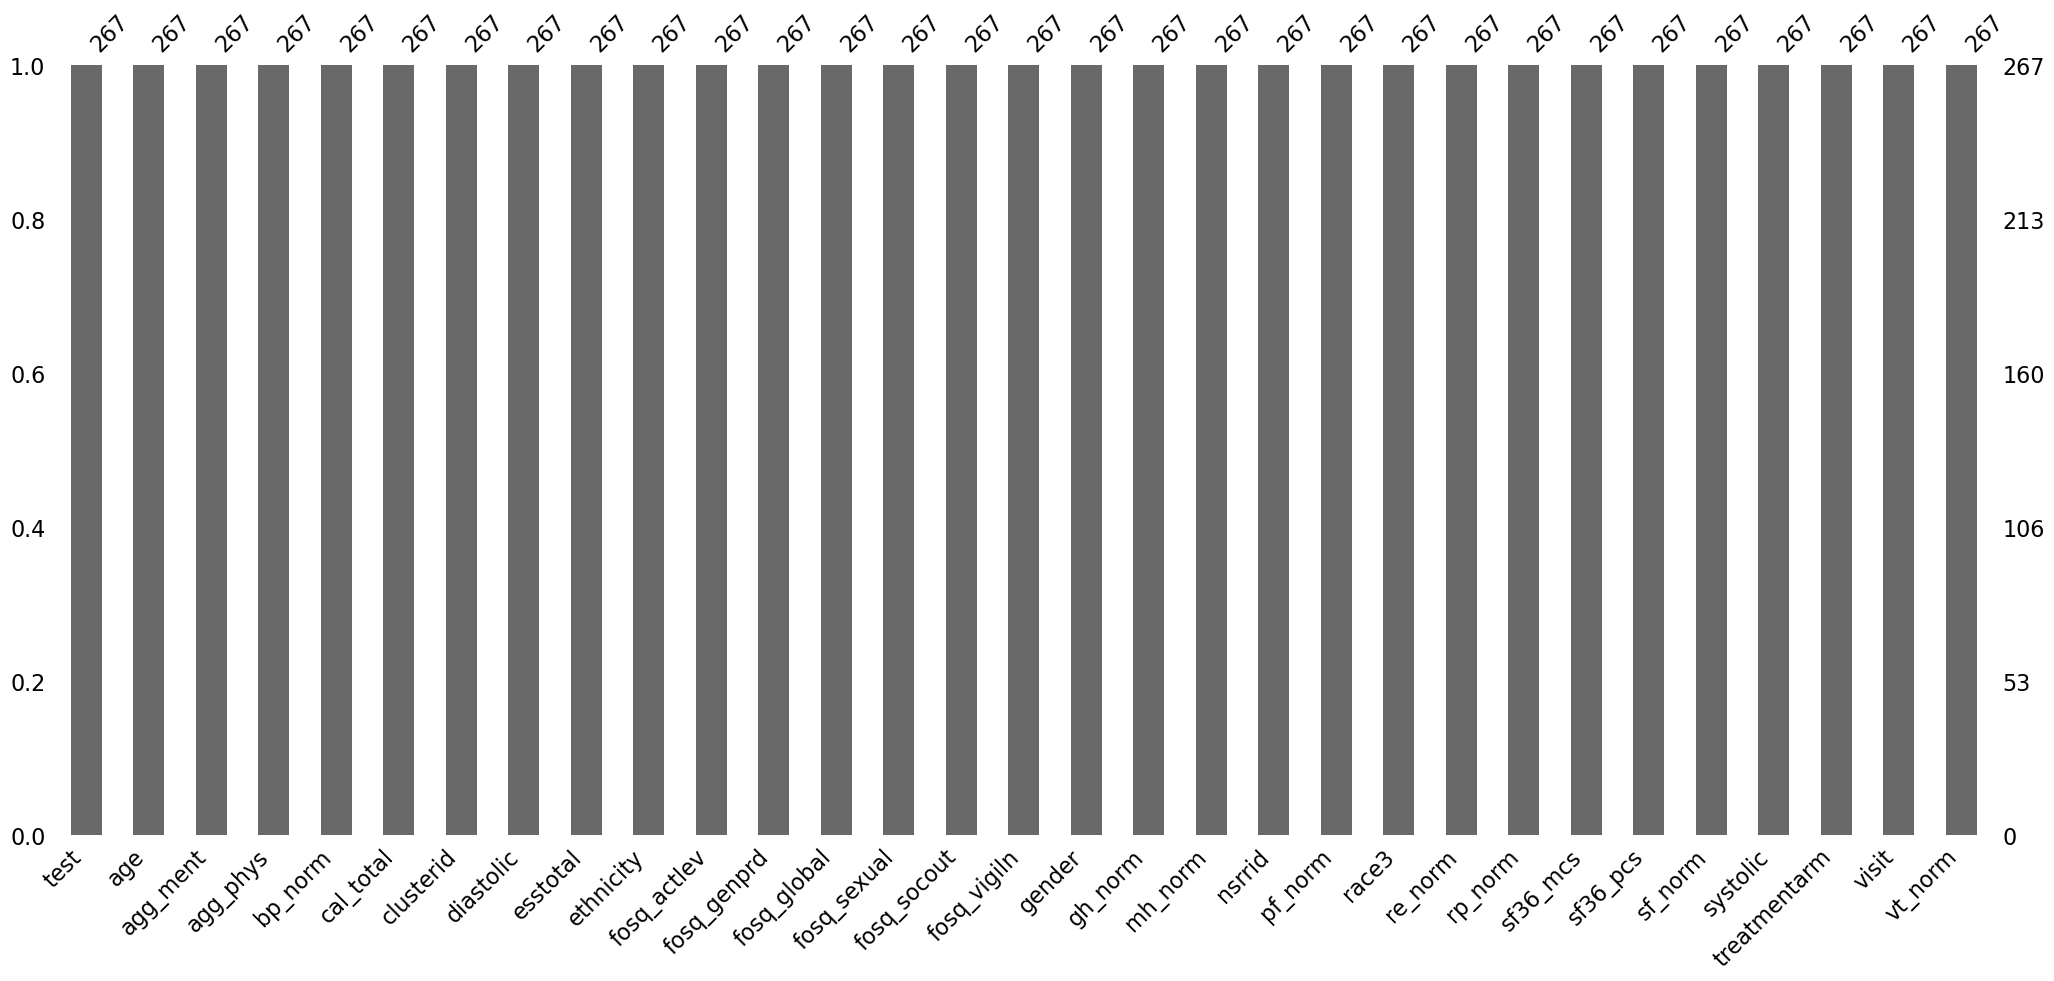

In [47]:
msno.bar(homepap)

Predictor variables: Systolic, diastolic, bmi, cal_total, avgpapuse. (which dataset to pull predictor variables from? or pull from all?)

Outcome variable: fosq_global

Covariates: age, gender, race3, ethnicity, neckcm, dxdep, dxhtn, dxdiab, dxemph, dxplhtn

age, cal_total, 'diastolic', 'ethnicity', 'fosq_global', 'gender', 'race3', 'systolic'

In [63]:
want_homepap = homepap_data[['nsrrid', 'test', 'systolic', 'diastolic', 'bmi', 'cal_total', 'avgpapuse', 'fosq_global', 'age', 'gender', 'race3', 'ethnicity', 'neckcm', 'dxdep', 'dxhtn', 'dxdiab', 'dxemph', 'dxplhtn']]

<AxesSubplot:>

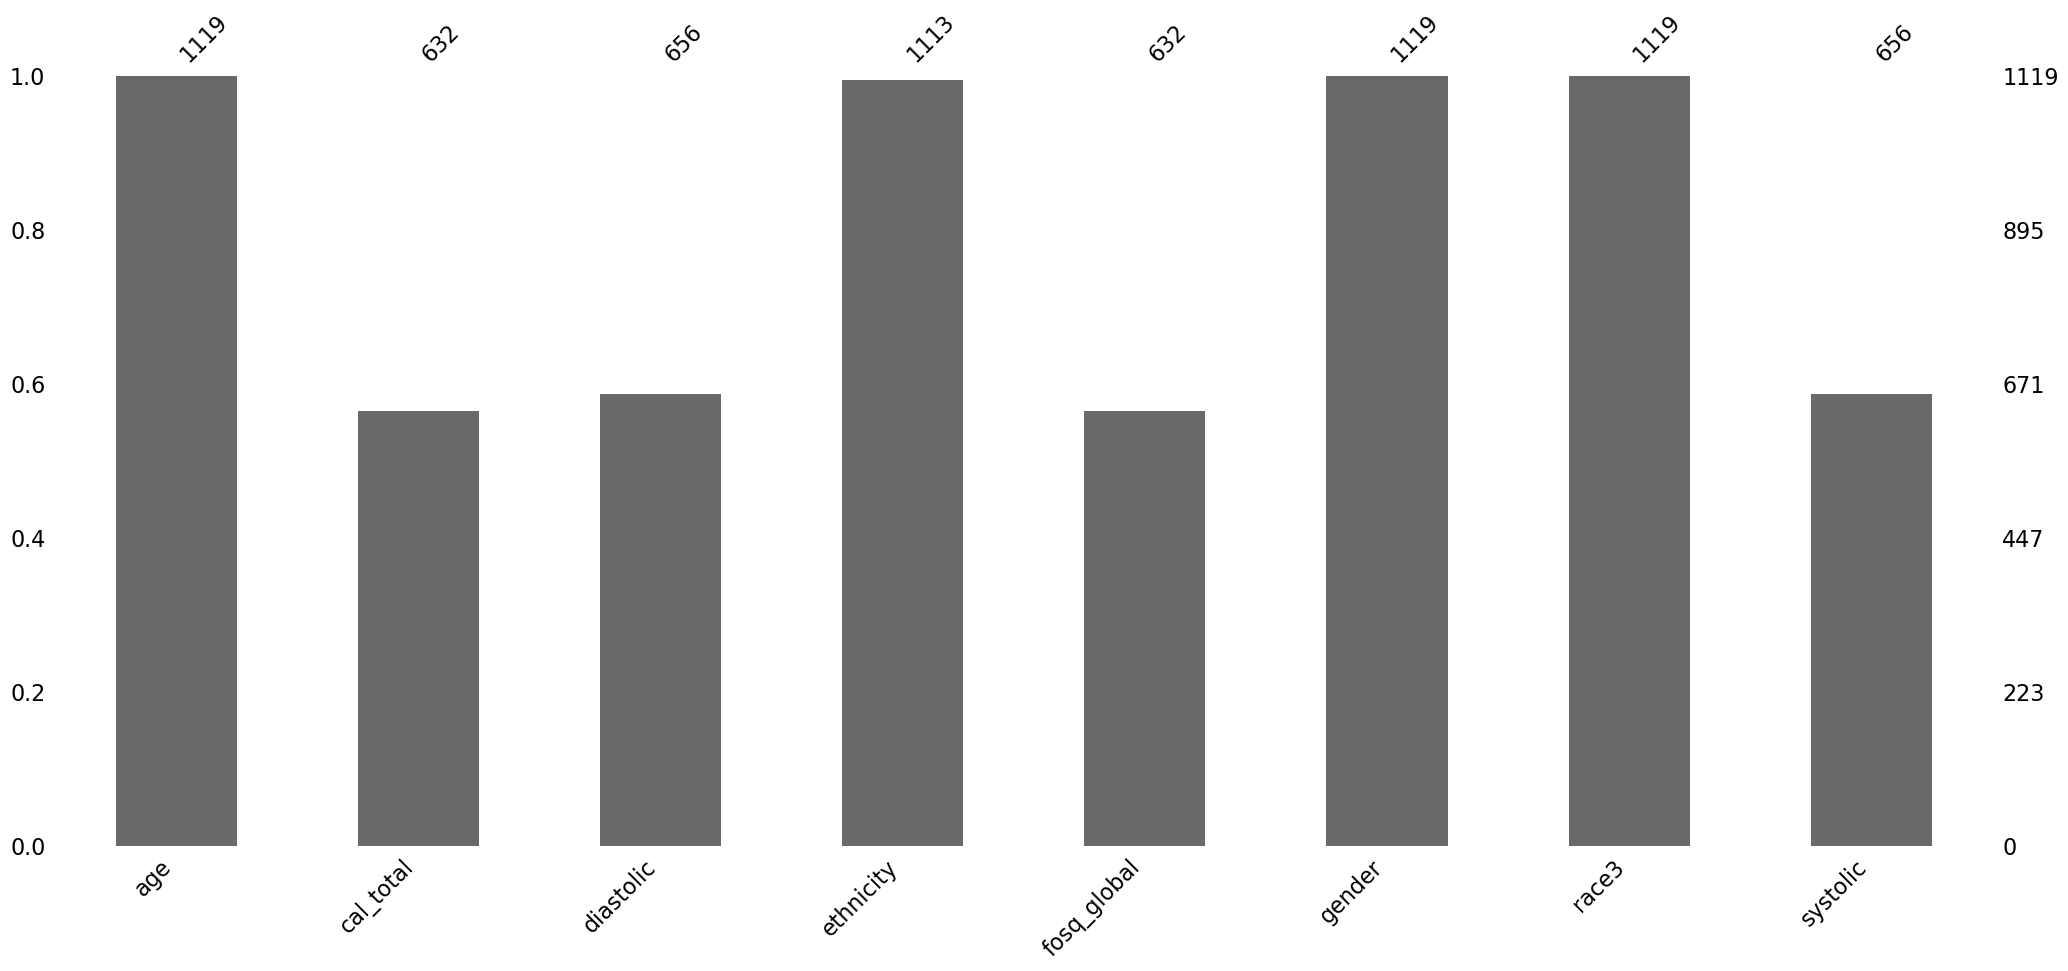

In [67]:
msno.bar(want_homepap[['age', 'cal_total', 'diastolic', 'ethnicity', 'fosq_global', 'gender', 'race3', 'systolic']])

In [76]:
# check which rows contain NaNs
nan_rows = want_homepap[want_homepap['fosq_global'].isna()]

In [80]:
nan_id = nan_rows['nsrrid'].values
nan_id = [*set(nan_id)]
len(nan_id)

237

In [82]:
want_w_drop = want_homepap[~want_homepap['nsrrid'].isin(nan_id)]

<AxesSubplot:>

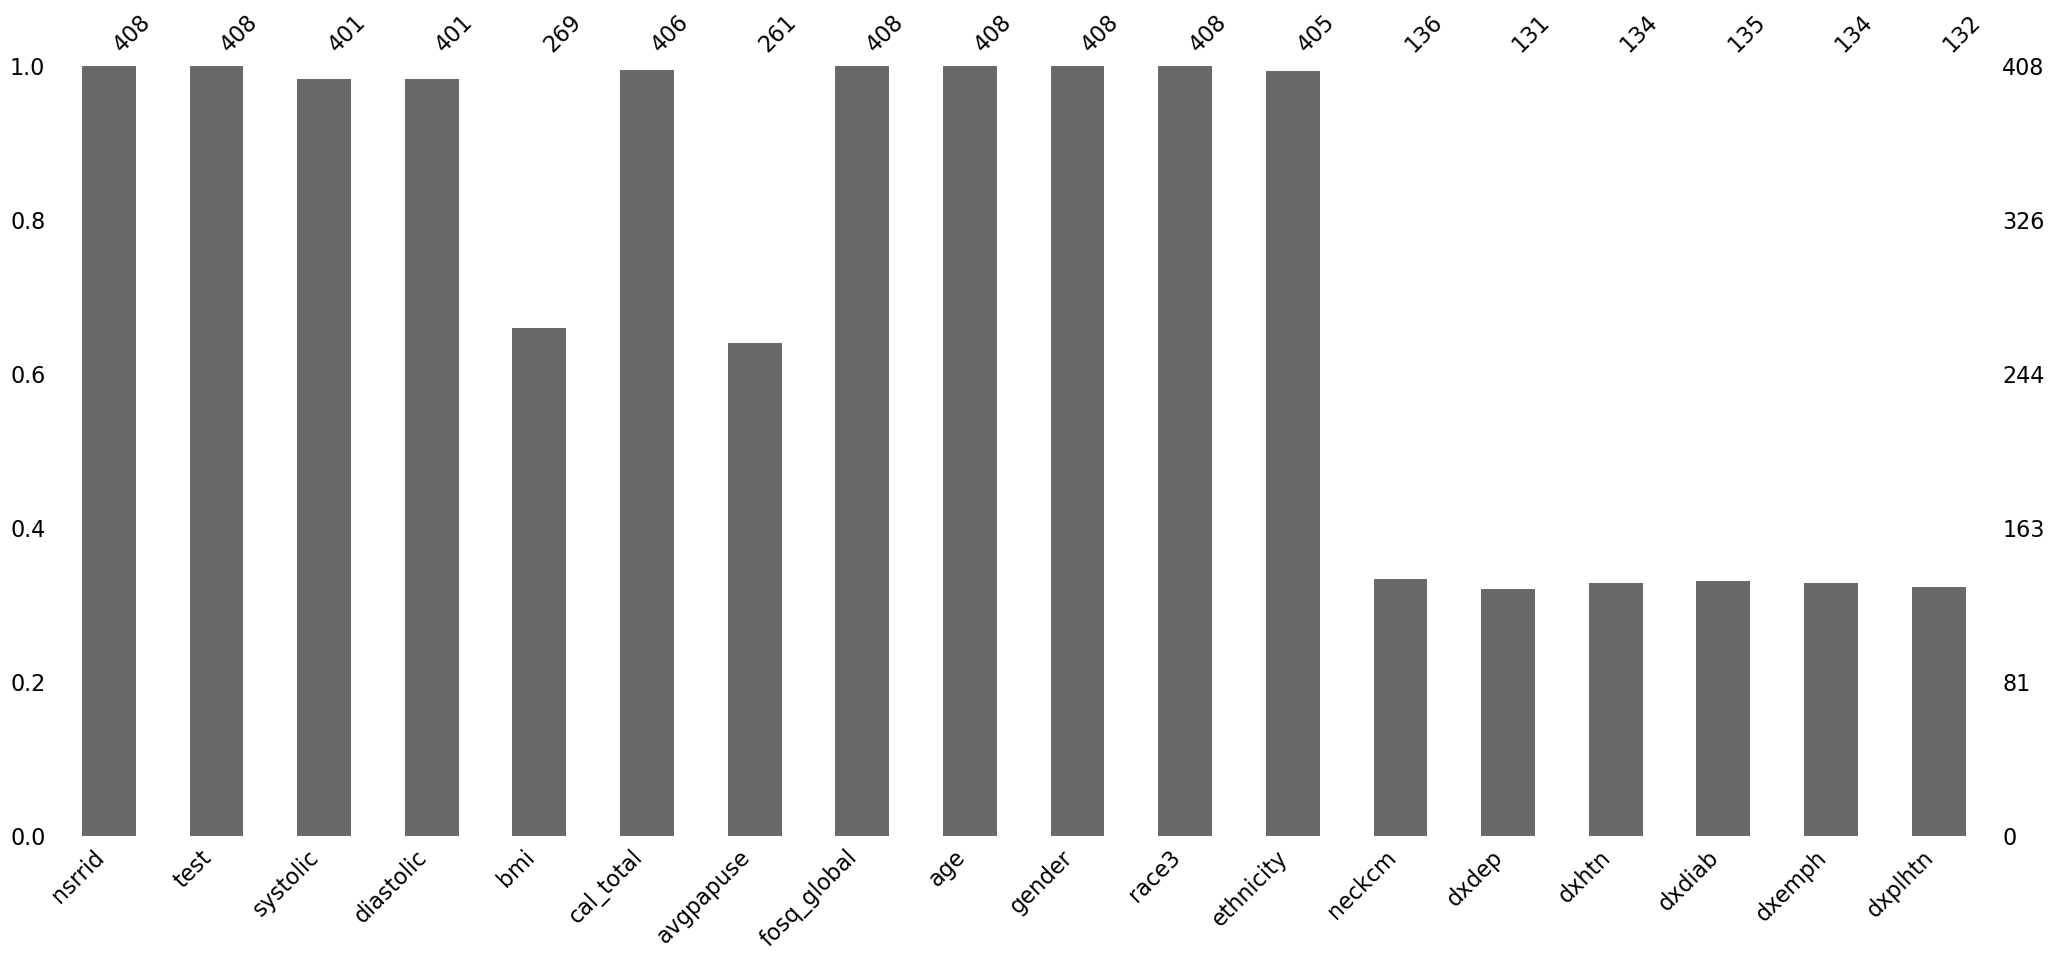

In [83]:
msno.bar(want_w_drop)

In [84]:
want_w_drop.to_csv('homepap_combined_w_drop.csv', index = False)